In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#parameters for Real NOK 70-30
r_0 = 0.0632
a_1 = -0.0375
a_2 = 1.1923
a_3 = -0.5069
b_1 = 1.0827
b_2 = -0.2950


std_r = 0.1389
std_x = 0.0171
std_f = 0.0218
cov_xf = 0.000148

r_mean = 0.03
mu = np.log(1+r_mean)

cov_e = [[std_r**2, 0, 0],
        [0, std_x**2, cov_xf],
        [0, cov_xf, std_f**2]]


In [3]:
#simulation

#generate errors
sample_size = 1000000
T = 40 #years
e = np.random.multivariate_normal([0,0,0], cov_e, (T, sample_size))

#
r = np.zeros((T, sample_size))
X = np.zeros((T, sample_size))
F = r = np.zeros((T, sample_size))

In [4]:
e.shape

(40, 1000000, 3)

In [5]:
#simulate the VAR
r = np.zeros((T, sample_size))
X = np.zeros((T, sample_size))
F = np.zeros((T, sample_size))

#first simulate r because it is independent
r = mu -.5*std_r**2 + e[:,:,0]# squared std even though it's not squared in specification
#then simulate X and F
#note that the first couple of values are taken from end of arrays
for t in range(T):
    X[t] = a_1*r[t-1] + a_2*X[t-1] + a_3*X[t-2] + e[t,:,1]
    F[t] = b_1*F[t-1] + b_2*F[t-2] + e[t,:,2]

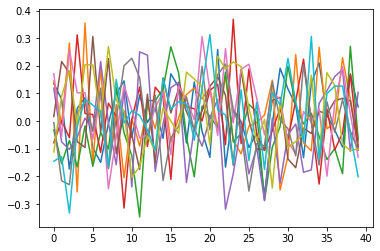

In [6]:
plt.plot(r[:,:10])

In [7]:
lambda_ = .5
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] + X[t] + F[t]
    
    

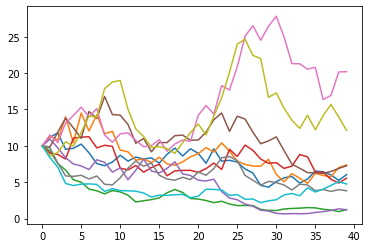

In [8]:
plt.plot(A[:,:10])

<AxesSubplot:ylabel='Count'>

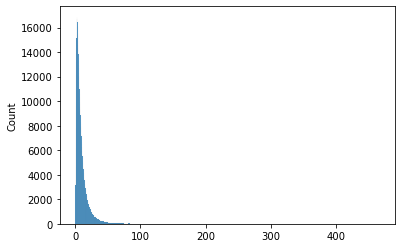

In [9]:
sns.histplot(A[-1,:])

In [10]:
des = pd.DataFrame(A[-1]).describe().T
des['depletion rate'] = (A[-1]==0).mean()

In [11]:
des.T

,0
count,1000000.000000
mean,9.601212
std,10.960952
min,0.000000
25%,3.371338
50%,6.359438
75%,11.796536
max,467.249410
depletion rate,0.001443


In [12]:
df = pd.DataFrame(index = ['5%', '25%', '50%', '75%', '95%', 'Mean','Depletion rate'])

In [13]:
lambda_ = 0
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] #+ X[t] + F[t]
    
df[r'$\lambda$=0, X=0,F=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), A[-1].mean(),(A[-1]==0).mean()]

In [14]:
lambda_ = .5
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] #+ X[t] + F[t]
    
df[r'$\lambda$=0.5, X=0,F=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), A[-1].mean(),(A[-1]==0).mean()]

In [15]:
lambda_ = 0
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] + X[t] #+ F[t]
    
df[r'$\lambda$=0,F=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), A[-1].mean(),(A[-1]==0).mean()]

In [16]:
lambda_ = 0.5
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] + X[t] #+ F[t]
    
df[r'$\lambda$=0.5,F=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), A[-1].mean(),(A[-1]==0).mean()]

In [17]:
lambda_ = 0
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] + X[t] + F[t]
    
df[r'$\lambda$=0'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), A[-1].mean(),(A[-1]==0).mean()]

In [18]:
lambda_ = 0.5
A = np.zeros((T, sample_size))
D = np.zeros((T, sample_size))
S = np.zeros((T, sample_size))
A[0] = 10
S[0] = r_mean*A[0]
D[0] = S[0] + X[0] + F[0]
for t in range(1,T):
    A[t] = np.maximum(A[t-1]*np.exp(r[t-1])-D[t-1], 0)#np.maximum(A[t-1]*np.exp(mu-.5*std_r**2+e[t-1,:,0])-D[t-1], 0)
    
    S[t] = np.maximum(lambda_*S[t-1]+(1-lambda_)*r_mean*A[t], r_mean*A[t])
    D[t] = S[t] + X[t] + F[t]
    
df[r'$\lambda$=0.5'] = [np.percentile(A[-1], 5),np.percentile(A[-1], 25), np.percentile(A[-1], 50), np.percentile(A[-1], 75), np.percentile(A[-1], 95), A[-1].mean(),(A[-1]==0).mean()]

In [19]:
df

,"$\lambda$=0, X=0,F=0","$\lambda$=0.5, X=0,F=0","$\lambda$=0,F=0","$\lambda$=0.5,F=0",$\lambda$=0,$\lambda$=0.5
5%,1.537898,1.392490,1.469467,1.321477,1.388847,1.236135
25%,3.671197,3.404147,3.659683,3.391478,3.639846,3.371338
50%,6.713911,6.309257,6.757103,6.351552,6.764782,6.359438
75%,12.242545,11.636382,12.384843,11.775071,12.403567,11.796536
95%,29.157635,28.072338,29.565472,28.480109,29.616453,28.524061
Mean,9.994774,9.513281,10.085435,9.602027,10.085299,9.601212
Depletion rate,0.000000,0.000000,0.000066,0.000136,0.001000,0.001443
